In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

In [2]:
""" Finding W_hat """
def calculate_w_hat (x_train , y_train):
    xtr = x_train.transpose()
    xtrx = np.dot(xtr , x_train)
    xtrx_inv = np.linalg.inv(xtrx)
    w1= np.dot(xtrx_inv , xtr)
    w_hat = np.dot(w1,y_train)
    return(w_hat)

In [3]:

""" Finding Y_hat """
def calculate_y_hat (x_train , w_hat):
    y_hat = np.dot(x_train , w_hat)
    return(y_hat)

In [4]:
""" Finding Mean_Square_Error (MSE) """
def calculate_MSE (y_hat, y_train):
    subtract = np.subtract(y_hat , y_train)
    squared = np.power(subtract[:,0], 2)
    add = squared.sum(axis = 0)
    MSE = np.divide(add, 50)
    return(MSE)

In [8]:
""" Data Extraction """
w_ridge_all = []
x_train = []
y_train = []
with open('Dataset_1_train.csv','r') as file:
    lines = file.readlines()
    for l in lines:
        lread = l.split(',')
        x_train.append(float(lread[0]))
        y_train.append(float(lread[1]))
print(type(lread))
np.set_printoptions(precision=10)
x_train = np.matrix(x_train, dtype= np.float)
x_train = x_train.transpose()
y_train = np.matrix(y_train, dtype= np.float)
y_train = y_train.transpose()


<class 'list'>


In [6]:
""" Fit 20-degree polynomial """
x_train = np.insert(x_train, 0, 1, axis = 1)
for n in range (2,21):
    newrow = np.power( x_train[:,1] , n)
    x_train = np.hstack([x_train, newrow])

w_hat_train = calculate_w_hat(x_train , y_train)  
y_hat_train = calculate_y_hat(x_train , w_hat_train)
MSE = calculate_MSE(y_hat_train , y_train)
print ('Train MSE:' , MSE)

Train MSE: [[ 6.4747040051]]


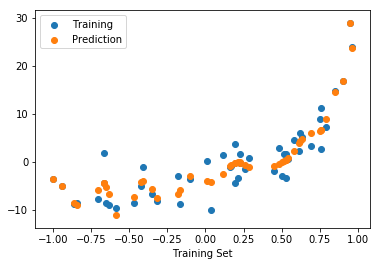

In [7]:
a = np.array(x_train[:,1]).squeeze()
b = np.array(y_train).squeeze()
c = np.array (y_hat_train).squeeze()
plt.scatter(a , b, label = 'Training')
plt.scatter(a , c, label = 'Prediction')
plt.xlabel('Training Set')
plt.legend(loc ='upper left')
plt.show()

In [8]:
""" Data Extraction """
x_val = []
y_val = []
with open('Dataset_1_valid.csv','r') as file:
    lines = file.readlines()
    for l in lines:
        lread = l.split(',')
        x_val.append(float(lread[0]))
        y_val.append(float(lread[1]))

np.set_printoptions(precision=10)
x_val = np.matrix(x_val, dtype= np.float)
x_val = x_val.transpose()
y_val = np.matrix(y_val, dtype= np.float)
y_val = y_val.transpose()

In [9]:
""" Fit 20-degree polynomial """
x_val = np.insert(x_val, 0, 1, axis = 1)
# print(x_val.shape)
for n in range (2,21):
    newrow_val = np.power( x_val[:,1] , n)
    x_val = np.hstack([x_val, newrow])
#     print(x_val.shape)

In [10]:
y_hat_val = calculate_y_hat(x_val , w_hat_train)
MSE = calculate_MSE(y_hat_val , y_val)
print ('Validation MSE:', MSE)

Validation MSE: [[ 2942.9407753311]]


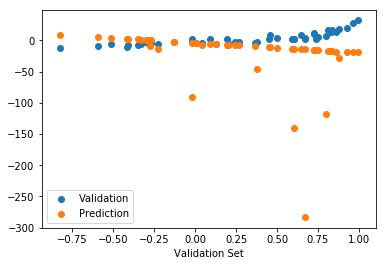

In [11]:
a = np.array(x_val[:,1]).squeeze()
b = np.array(y_val).squeeze()
c = np.array (y_hat_val).squeeze()
plt.scatter(a , b, label = 'Validation')
plt.scatter(a , c, label = 'Prediction')
plt.xlabel('Validation Set')
plt.legend(loc ='lower left')
plt.show()

In [12]:
def L2_Regularization(x_train , y_train, lam):
    i = np.identity(21)
    lam_i = np.dot( i, lam)
    xtr = x_train.transpose()
    xtrx = np.dot(xtr , x_train)
    w_1 = np.add(xtrx, lam_i )
    w_2 = np.linalg.inv (w_1)
    w_3 = np.dot(xtr , y_train)
    w_ridge = np.dot(w_2 , w_3)      
    return(w_ridge)


In [13]:
MSE_all_train = []
MSE_all_val = []
info = []
lambda_info = []
for lam in  np.linspace(0, 1, 20):

    w_ridge = L2_Regularization(x_train , y_train, lam)
    w_ridge_all.append(w_ridge)
    y_hat_train = calculate_y_hat(x_train , w_ridge)
    MSE = calculate_MSE(y_hat_train , y_train)
    MSE_all_train.append(MSE)
    y_hat_val = calculate_y_hat(x_val , w_ridge)
    MSE = calculate_MSE(y_hat_val , y_val)
    MSE_all_val.append(MSE)
    lambda_info.append([lam])


In [16]:
print(np.linspace(0, 1, 20))
print ('\n'"All MSE's for Validation:"'\n', MSE_all_val)
print ('\n'"All MSE's for Train:"'\n', MSE_all_train)
print(w_ridge_all[1])

[ 0.            0.0526315789  0.1052631579  0.1578947368  0.2105263158
  0.2631578947  0.3157894737  0.3684210526  0.4210526316  0.4736842105
  0.5263157895  0.5789473684  0.6315789474  0.6842105263  0.7368421053
  0.7894736842  0.8421052632  0.8947368421  0.9473684211  1.          ]

All MSE's for Validation:
 [matrix([[ 2944.3558840219]]), matrix([[ 81.4156900597]]), matrix([[ 85.9334480978]]), matrix([[ 87.9066745116]]), matrix([[ 88.9989146768]]), matrix([[ 89.678589642]]), matrix([[ 90.1305901146]]), matrix([[ 90.4431280833]]), matrix([[ 90.6638264868]]), matrix([[ 90.8207480767]]), matrix([[ 90.9315485041]]), matrix([[ 91.0079158799]]), matrix([[ 91.0579094869]]), matrix([[ 91.0872748818]]), matrix([[ 91.1002236415]]), matrix([[ 91.0999164457]]), matrix([[ 91.0887736581]]), matrix([[ 91.0686814243]]), matrix([[ 91.0411322358]]), matrix([[ 91.0073231184]])]

All MSE's for Train:
 [matrix([[ 6.4748319557]]), matrix([[ 8.9423319836]]), matrix([[ 9.0012191979]]), matrix([[ 9.03054192

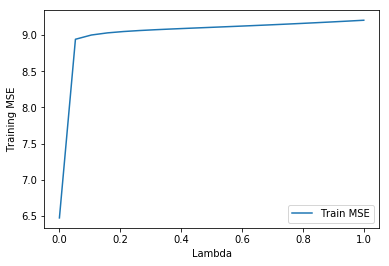

In [49]:
""" All MSE for Train """
a = np.array(MSE_all_train[:]).squeeze()
c = np.array (lambda_info[:]).squeeze()
plt.xlabel('Lambda')
plt.ylabel('Training MSE')
plt.plot(c, a, label = 'Train MSE')
plt.legend(loc ='lower right')
plt.show()

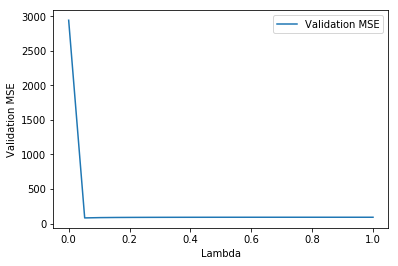

In [47]:
""" All MSE for Validation """
b = np.array(MSE_all_val[:]).squeeze()
c = np.array (lambda_info[:]).squeeze()
plt.plot (c, b, label = 'Validation MSE')
plt.xlabel('Lambda')
plt.ylabel('Validation MSE')
plt.legend(loc ='upper right')
plt.show()

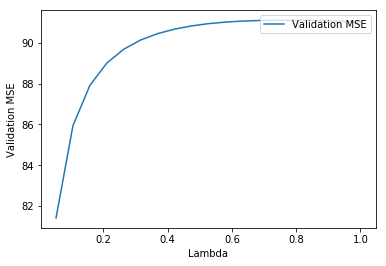

In [48]:
""" Removing the highest MSE and plotting the rest for Validation """
b = np.array(MSE_all_val[1:]).squeeze()
c = np.array (lambda_info[1:]).squeeze()
plt.plot (c, b, label = 'Validation MSE')
plt.xlabel('Lambda')
plt.ylabel('Validation MSE')
plt.legend(loc ='upper right')
plt.show()

In [50]:
""" Data Extraction for Test Dataset """
x_test = []
y_test = []
with open('Dataset_1_test.csv','r') as file:
    lines = file.readlines()
    for l in lines:
        lread = l.split(',')
        x_test.append(float(lread[0]))
        y_test.append(float(lread[1]))

np.set_printoptions(precision=10)
x_test = np.matrix(x_test, dtype= np.float)
x_test = x_test.transpose()
y_test = np.matrix(y_test, dtype= np.float)
y_test = y_test.transpose()

""" Fit 20-degree polynomial """
x_test = np.insert(x_test, 0, 1, axis = 1)
for n in range (2,21):
    newrow = np.power( x_test[:,1] , n)
    x_test = np.hstack([x_test, newrow])

In [55]:
lambda_best = np.array(lambda_info[1]).squeeze()
w = L2_Regularization(x_train , y_train, lambda_best)
y_hat_test = calculate_y_hat(x_test , w)
MSE_test = calculate_MSE(y_hat_test, y_test)
print ( "MSE Test:" , MSE_test)
print ("Best Lambda :", lambda_best)

MSE Test: [[ 10.6080448123]]
Best Lambda : 0.05263157894736842


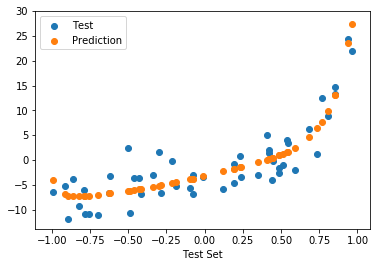

In [64]:
a = np.array(x_test[:,1]).squeeze()
b = np.array(y_test).squeeze()
c = np.array (y_hat_test).squeeze()
plt.scatter(a , b, label = 'Test')
plt.scatter(a , c, label = 'Prediction')
plt.xlabel('Test Set')
plt.legend(loc ='upper left')
plt.show()